# Tutorial for batch processing in `expsolve`

We illustrate this with `expsolve.fourier`, which is imported as `ex`.

Batch processing is built-in in `expsolve` from ground up. This notebook demonstrates how to use it in practice.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import expsolve as es
import expsolve.discretize.tensorgrid as ex
import expsolve.evolve.splittings.classical as split

import torch
from torch import exp, sin, cos, abs, real, imag, pi
from torch.linalg import matrix_exp

In [28]:
xrange = [0, 2*np.pi]
n = 100
x = ex.grid1d(n, xrange)


# random functions
def randomf():
    # q real, p int
    p = np.random.randint(low=-5, high=5, size=4)
    q = np.random.normal(loc=0.2, scale=0.1, size=5)
    return sin(3*x) + q[0]*sin(p[0]*x) + q[1]*exp(q[2]*sin(p[1]*x)) + q[3]*cos(p[2]*x)*exp(q[4]*cos(p[3]*x)) + p[3]*x/2


## Batch visualization

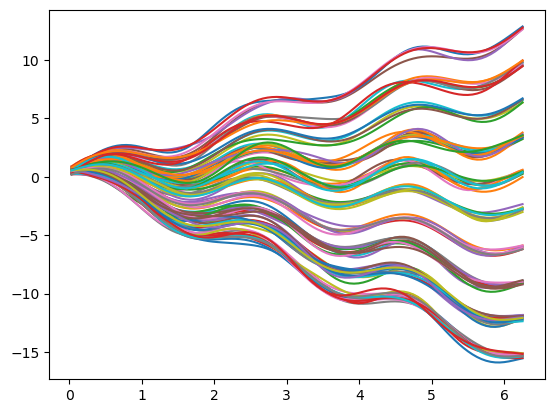

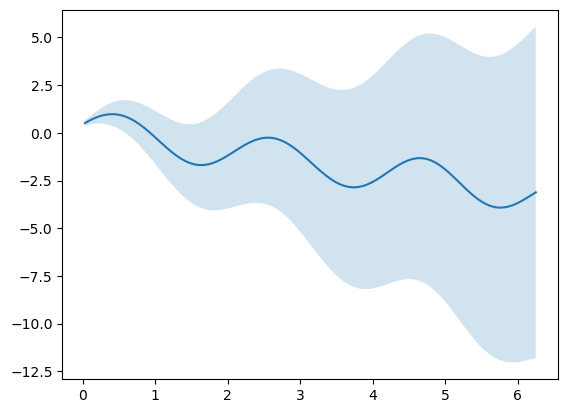

In [29]:
N = 100
frlist = [randomf() for _ in range(N)]
frtensor = torch.stack([fr.flatten() for fr in frlist]) 

plt.figure()
ex.plot(plt, x, frtensor, separatelines=True)
plt.show()

plt.figure()
ex.plot(plt, x, frtensor)
plt.show()